In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
##Importing data from file, and creating a dataframe

data = pd.read_csv("cbb.csv")
data_df = pd.DataFrame(data).fillna(' ')
df = data_df.set_index('TEAM')
df.head()

,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
TEAM,,,,,,,,,,,,,,,,,,,,,
North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1,2016
Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1,2015
Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3,2018
Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3,2019
Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1,2017


Focusing on just the University of Michigan

In [3]:
##Gathering all UofM data

umich = df.loc['Michigan']
umich


,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
TEAM,,,,,,,,,,,,,,,,,,,,,
Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3,2018
Michigan,B10,31,15,110.9,97.1,0.8226,49.4,50.9,15.6,19.4,...,26.7,47.0,50.8,35.3,34.0,60.2,-2.4,,,2015
Michigan,B10,35,22,113.4,99.4,0.8200,54.5,51.4,14.5,17.9,...,27.0,52.6,51.1,38.0,34.7,66.3,0.8,R64,11,2016
Michigan,B10,38,26,123.3,97.6,0.9366,57.0,51.9,14.2,19.5,...,27.2,56.3,50.0,38.5,37.8,64.0,3.8,S16,7,2017
Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,18.0,...,24.1,51.8,44.3,34.2,29.1,65.9,9.2,S16,2,2019


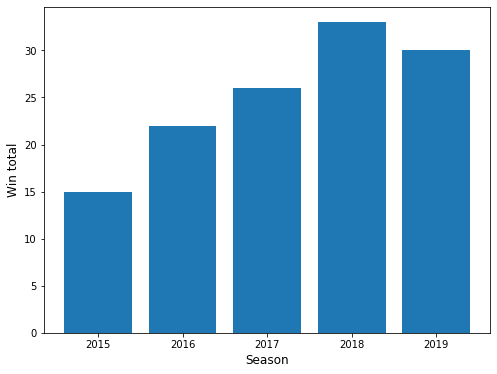

In [4]:
##Showing the win total, for UofM each of the 5 seasons to find the one with the most wins

umich_win = umich[["W", 'YEAR']].copy()

fig, ax = plt.subplots(figsize=(8,6))
plt.bar(umich_win['YEAR'], umich_win['W'])
plt.xlabel("Season", fontsize = 12)
plt.ylabel("Win total", fontsize = 12)
plt.show()

The barplot shows that the 2018 season was the most successful based on win total. But why??

In [5]:
umich_stats = umich[['ADJOE','ADJDE', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'YEAR']].copy()
stats = umich_stats.set_index('YEAR')

In [6]:
stats2 = stats.sort_index(axis = 0)

In [7]:
##Creating a table with just the stats about team performance, to rank and compare each season. See if there is a reason why they were so successful one year and not so in others

stats2

,ADJOE,ADJDE,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T
YEAR,,,,,,,,,,,,,,,
2015,110.9,97.1,49.4,50.9,15.6,19.4,25.5,31.2,26.6,26.7,47.0,50.8,35.3,34.0,60.2
2016,113.4,99.4,54.5,51.4,14.5,17.9,24.8,26.4,27.8,27.0,52.6,51.1,38.0,34.7,66.3
2017,123.3,97.6,57.0,51.9,14.2,19.5,24.7,30.0,30.1,27.2,56.3,50.0,38.5,37.8,64.0
2018,114.4,90.4,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9
2019,114.6,85.6,51.6,44.1,13.9,18.0,24.7,24.8,27.5,24.1,51.8,44.3,34.2,29.1,65.9


In [8]:
## Ranking each stat, by year (5 is the highest, and 1 is the lowest)
stats2['ADJOE Rank'] = stats2['ADJOE'].rank()
stats2['ADJDE Rank'] = stats2['ADJDE'].rank()
stats2['EFG_O Rank'] = stats2['EFG_O'].rank()
stats2['EFG_D Rank'] = stats2['EFG_D'].rank()
stats2['TOR Rank'] = stats2['TOR'].rank()
stats2['TORD Rank'] = stats2['TORD'].rank()
stats2['ORB Rank'] = stats2['ORB'].rank()
stats2['DRB Rank'] = stats2['DRB'].rank()
stats2['FTR Rank'] = stats2['FTR'].rank()
stats2['FTRD Rank'] = stats2['FTRD'].rank()
stats2['2P_O Rank'] = stats2['2P_O'].rank()
stats2['2P_D Rank'] = stats2['2P_D'].rank()
stats2['3P_O Rank'] = stats2['3P_O'].rank()
stats2['3P_D Rank'] = stats2['3P_D'].rank()
stats2['ADJ_T Rank'] = stats2['ADJ_T'].rank()

In [9]:
rank = stats2[['ADJOE Rank','ADJDE Rank', 'EFG_O Rank', 'EFG_D Rank', 'TOR Rank', 'TORD Rank', 'ORB Rank', 'DRB Rank', 'FTR Rank', 'FTRD Rank', '2P_O Rank', '2P_D Rank', '3P_O Rank', '3P_D Rank', 'ADJ_T Rank']].copy()
rank

,ADJOE Rank,ADJDE Rank,EFG_O Rank,EFG_D Rank,TOR Rank,TORD Rank,ORB Rank,DRB Rank,FTR Rank,FTRD Rank,2P_O Rank,2P_D Rank,3P_O Rank,3P_D Rank,ADJ_T Rank
YEAR,,,,,,,,,,,,,,,
2015,1.0,3.0,1.0,3.0,5.0,3.0,4.5,5.0,1.0,2.0,1.0,4.0,3.0,3.0,1.0
2016,2.0,5.0,4.0,4.0,4.0,1.0,3.0,3.0,3.0,3.0,3.0,5.0,4.0,4.0,5.0
2017,5.0,4.0,5.0,5.0,3.0,4.5,1.5,4.0,4.0,4.0,5.0,3.0,5.0,5.0,2.0
2018,3.0,2.0,3.0,2.0,2.0,4.5,4.5,2.0,5.0,5.0,4.0,2.0,2.0,2.0,3.5
2019,4.0,1.0,2.0,1.0,1.0,2.0,1.5,1.0,2.0,1.0,2.0,1.0,1.0,1.0,3.5


In [10]:
rank['Total Rank'] = (rank['ADJOE Rank'] + rank['ADJDE Rank'] + rank['EFG_O Rank'] + rank['EFG_D Rank'] + rank['TOR Rank'] + rank['TORD Rank'] + rank['ORB Rank'] + rank['DRB Rank'] + rank['FTR Rank'] + rank['FTRD Rank'] + rank['2P_O Rank'] + rank['2P_D Rank'] + rank['3P_O Rank'] + rank['3P_D Rank'] + rank['ADJ_T Rank']) / 15
rank

,ADJOE Rank,ADJDE Rank,EFG_O Rank,EFG_D Rank,TOR Rank,TORD Rank,ORB Rank,DRB Rank,FTR Rank,FTRD Rank,2P_O Rank,2P_D Rank,3P_O Rank,3P_D Rank,ADJ_T Rank,Total Rank
YEAR,,,,,,,,,,,,,,,,
2015,1.0,3.0,1.0,3.0,5.0,3.0,4.5,5.0,1.0,2.0,1.0,4.0,3.0,3.0,1.0,2.700000
2016,2.0,5.0,4.0,4.0,4.0,1.0,3.0,3.0,3.0,3.0,3.0,5.0,4.0,4.0,5.0,3.533333
2017,5.0,4.0,5.0,5.0,3.0,4.5,1.5,4.0,4.0,4.0,5.0,3.0,5.0,5.0,2.0,4.000000
2018,3.0,2.0,3.0,2.0,2.0,4.5,4.5,2.0,5.0,5.0,4.0,2.0,2.0,2.0,3.5,3.100000
2019,4.0,1.0,2.0,1.0,1.0,2.0,1.5,1.0,2.0,1.0,2.0,1.0,1.0,1.0,3.5,1.666667


The data  doesn't show why Michigan was so successful the 2018 season. Based upon the rankings the 2017 season was better because the average rating is the highest, among the 5 seasons.
    In 2018 they ranked highest in: Free Throws Allowed, Free Throws, Offensive Rebound %, and Steals 
    In 2018 they ranked lowest in: no stat
It could be implied that in 2018, the team was well rounded, had no real weakness, and this allowed them to get to the 
national championship.

Focusing on the BIG 10 

In [11]:
##Filtering through to find entries that are BIG 10 specific

b10 = df[df['CONF'] == 'B10'].drop(['YEAR', 'WAB'], axis = 1)
avg_b10 = b10.groupby(['TEAM']).mean()
avg_b10

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T
TEAM,,,,,,,,,,,,,,,,,,
Illinois,33.0,16.0,107.62,98.50,0.73040,49.56,51.40,17.12,20.44,28.68,29.12,31.36,35.46,47.68,51.12,35.12,34.54,69.16
Indiana,33.8,20.0,114.50,98.90,0.83508,54.08,49.56,18.86,17.66,33.76,29.26,34.34,32.24,53.20,48.66,36.72,34.06,68.54
Iowa,33.8,20.0,114.64,99.26,0.82882,51.78,49.84,17.28,18.14,32.64,30.26,36.72,27.70,50.12,49.32,36.50,33.94,69.90
Maryland,33.4,24.0,112.80,95.86,0.86622,52.90,46.58,19.32,16.40,30.78,29.14,38.14,27.66,51.90,45.10,36.36,32.76,67.24
Michigan,36.2,25.2,115.32,94.02,0.89664,53.28,49.20,14.44,18.86,25.04,27.46,28.54,27.00,52.48,48.60,36.24,33.76,64.46
Michigan St.,36.6,27.6,117.84,93.76,0.92720,55.12,44.30,18.66,15.22,34.14,26.32,33.14,33.20,52.92,41.98,39.42,32.48,67.24
Minnesota,33.0,17.2,107.76,98.30,0.71820,48.72,49.52,16.58,18.50,29.52,30.14,37.26,30.64,47.76,47.50,33.76,35.48,69.68
Nebraska,32.6,16.4,107.00,97.30,0.73932,48.16,48.80,17.14,19.44,30.16,30.88,33.94,33.60,47.78,46.62,32.58,35.36,67.62
Northwestern,32.6,17.4,107.38,97.40,0.74670,49.74,47.74,16.76,17.34,28.50,28.76,29.36,34.98,48.44,45.62,34.52,34.20,64.96


Text(0.5, 1.0, 'Average Wins from 2015-2019')

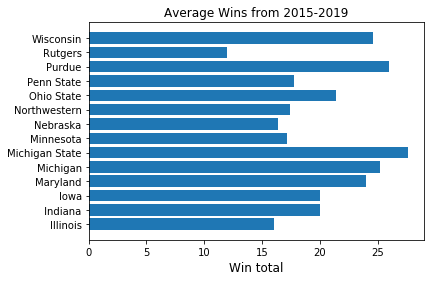

In [12]:
teams = ['Illinois', ' Indiana', 'Iowa', 'Maryland', 'Michigan', 'Michigan State', 'Minnesota', 'Nebraska', 'Northwestern', 'Ohio State', 'Penn State', 'Purdue', 'Rutgers', 'Wisconsin']
plt.barh(teams, avg_b10['W'])
plt.xlabel("Win total", fontsize = 12)
plt.title('Average Wins from 2015-2019', fontsize = 12)

In [13]:
##Focusing on the most winning, top 5 teams and comparing them

avg_5 = avg_b10.sort_values('W', ascending = False).head()
avg_5

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T
TEAM,,,,,,,,,,,,,,,,,,
Michigan St.,36.6,27.6,117.84,93.76,0.92720,55.12,44.30,18.66,15.22,34.14,26.32,33.14,33.20,52.92,41.98,39.42,32.48,67.24
Purdue,35.4,26.0,118.06,94.08,0.92580,54.18,46.68,17.50,16.84,32.96,26.74,35.18,29.06,52.40,44.90,37.82,33.42,68.00
Michigan,36.2,25.2,115.32,94.02,0.89664,53.28,49.20,14.44,18.86,25.04,27.46,28.54,27.00,52.48,48.60,36.24,33.76,64.46
Wisconsin,35.8,24.6,113.86,93.20,0.88458,51.48,47.94,15.58,17.90,30.80,26.30,33.42,28.00,50.68,45.46,35.34,35.80,63.34
Maryland,33.4,24.0,112.80,95.86,0.86622,52.90,46.58,19.32,16.40,30.78,29.14,38.14,27.66,51.90,45.10,36.36,32.76,67.24


In [14]:
avg_5['ADJOE Rank'] = avg_5['ADJOE'].rank()
avg_5['ADJDE Rank'] = avg_5['ADJDE'].rank()
avg_5['EFG_O Rank'] = avg_5['EFG_O'].rank()
avg_5['EFG_D Rank'] = avg_5['EFG_D'].rank()
avg_5['TOR Rank'] = avg_5['TOR'].rank()
avg_5['TORD Rank'] = avg_5['TORD'].rank()
avg_5['ORB Rank'] = avg_5['ORB'].rank()
avg_5['DRB Rank'] = avg_5['DRB'].rank()
avg_5['FTR Rank'] = avg_5['FTR'].rank()
avg_5['FTRD Rank'] = avg_5['FTRD'].rank()
avg_5['2P_O Rank'] = avg_5['2P_O'].rank()
avg_5['2P_D Rank'] = avg_5['2P_D'].rank()
avg_5['3P_O Rank'] = avg_5['3P_O'].rank()
avg_5['3P_D Rank'] = avg_5['3P_D'].rank()
avg_5['ADJ_T Rank'] = avg_5['ADJ_T'].rank()

In [15]:
avg_5

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,TORD Rank,ORB Rank,DRB Rank,FTR Rank,FTRD Rank,2P_O Rank,2P_D Rank,3P_O Rank,3P_D Rank,ADJ_T Rank
TEAM,,,,,,,,,,,,,,,,,,,,,
Michigan St.,36.6,27.6,117.84,93.76,0.92720,55.12,44.30,18.66,15.22,34.14,...,1.0,5.0,2.0,2.0,5.0,5.0,1.0,5.0,1.0,4.0
Purdue,35.4,26.0,118.06,94.08,0.92580,54.18,46.68,17.50,16.84,32.96,...,3.0,4.0,3.0,4.0,4.0,3.0,2.0,4.0,3.0,5.0
Michigan,36.2,25.2,115.32,94.02,0.89664,53.28,49.20,14.44,18.86,25.04,...,5.0,1.0,4.0,1.0,1.0,4.0,5.0,2.0,4.0,2.0
Wisconsin,35.8,24.6,113.86,93.20,0.88458,51.48,47.94,15.58,17.90,30.80,...,4.0,3.0,1.0,3.0,3.0,1.0,4.0,1.0,5.0,1.0
Maryland,33.4,24.0,112.80,95.86,0.86622,52.90,46.58,19.32,16.40,30.78,...,2.0,2.0,5.0,5.0,2.0,2.0,3.0,3.0,2.0,3.0


In [16]:
b10_rank = rank = avg_5[['ADJOE Rank','ADJDE Rank', 'EFG_O Rank', 'EFG_D Rank', 'TOR Rank', 'TORD Rank', 'ORB Rank', 'DRB Rank', 'FTR Rank', 'FTRD Rank', '2P_O Rank', '2P_D Rank', '3P_O Rank', '3P_D Rank', 'ADJ_T Rank']].copy()
b10_rank['Total Rank'] = (b10_rank['ADJOE Rank'] + b10_rank['ADJDE Rank'] + b10_rank['EFG_O Rank'] + b10_rank['EFG_D Rank'] + b10_rank['TOR Rank'] + b10_rank['TORD Rank'] + b10_rank['ORB Rank'] + b10_rank['DRB Rank'] + b10_rank['FTR Rank'] + b10_rank['FTRD Rank'] + b10_rank['2P_O Rank'] + b10_rank['2P_D Rank'] + b10_rank['3P_O Rank'] + b10_rank['3P_D Rank'] + b10_rank['ADJ_T Rank']) / 15
b10_rank

,ADJOE Rank,ADJDE Rank,EFG_O Rank,EFG_D Rank,TOR Rank,TORD Rank,ORB Rank,DRB Rank,FTR Rank,FTRD Rank,2P_O Rank,2P_D Rank,3P_O Rank,3P_D Rank,ADJ_T Rank,Total Rank
TEAM,,,,,,,,,,,,,,,,
Michigan St.,4.0,2.0,5.0,1.0,4.0,1.0,5.0,2.0,2.0,5.0,5.0,1.0,5.0,1.0,4.0,3.133333
Purdue,5.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,2.0,4.0,3.0,5.0,3.600000
Michigan,3.0,3.0,3.0,5.0,1.0,5.0,1.0,4.0,1.0,1.0,4.0,5.0,2.0,4.0,2.0,2.933333
Wisconsin,2.0,1.0,1.0,4.0,2.0,4.0,3.0,1.0,3.0,3.0,1.0,4.0,1.0,5.0,1.0,2.400000
Maryland,1.0,5.0,2.0,2.0,5.0,2.0,2.0,5.0,5.0,2.0,2.0,3.0,3.0,2.0,3.0,2.933333


Text(0.5, 1.0, 'Average Total Rank from 2015-2019')

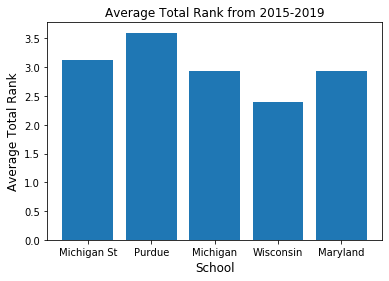

In [17]:
##Visual representation of the "Total Rank" column in the dataframe above

top_5 = ['Michigan St', 'Purdue', 'Michigan', 'Wisconsin', 'Maryland']
plt.bar(top_5, b10_rank['Total Rank'])
plt.xlabel("School", fontsize = 12)
plt.ylabel("Average Total Rank", fontsize = 12)
plt.title('Average Total Rank from 2015-2019', fontsize = 12)

Although Purdue has the highest average rank among all the categories, Michigan State has the highest in: field goal percentage, and allow the lowest field goal percentage. They shoot high quality shots,
and only allow tough shots for oppenents.  They also rank the highest in offensive rebounds, 2 point shot percentage, and 2 point shot percentage. This could lead to them winning the most games on average in the BIG 10

Now focusing on all conferences, which power 5 conference wins the most?

In [18]:
##Gathering dataframes about each conference and grouping by team, then averaging the 5 years (same proceess for big 10)

acc = df[df['CONF'] == 'ACC'].drop(['YEAR', 'WAB'], axis = 1)
avg_acc = acc.groupby(['TEAM']).mean()

b12 = df[df['CONF'] == 'B12'].drop(['YEAR', 'WAB'], axis = 1)
avg_b12 = b12.groupby(['TEAM']).mean()

p12 = df[df['CONF'] == 'P12'].drop(['YEAR', 'WAB'], axis = 1)
avg_p12 = p12.groupby(['TEAM']).mean()

sec = df[df['CONF'] == 'SEC'].drop(['YEAR', 'WAB'], axis = 1)
avg_sec = sec.groupby(['TEAM']).mean()


In [19]:
##Calculating the average number of wins per conference during the span from 2015- 2019, and will plot the values
w_b10 = avg_b10['W'].mean()
w_acc = avg_acc['W'].mean()
w_b12 = avg_b12['W'].mean()
w_p12 = avg_p12['W'].mean()
w_sec = avg_sec['W'].mean()

Text(0, 0.5, 'Average Number of Wins')

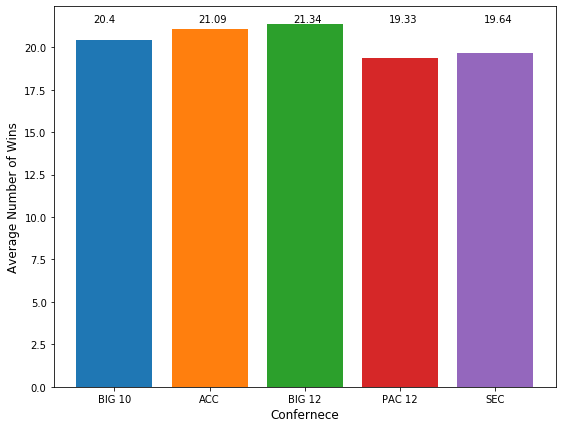

In [20]:
##Visual representation of the average wins during the span of 5 years
fig, ax = plt.subplots(figsize=(9,7))
plt.bar('BIG 10', w_b10)
plt.text(-.22,21.5, str(round(w_b10, 2)))

plt.bar('ACC', w_acc)
plt.text(.88,21.5, str(round(w_acc, 2)))

plt.bar('BIG 12', w_b12)
plt.text(1.88,21.5, str(round(w_b12, 2)))

plt.bar('PAC 12', w_p12)
plt.text(2.88,21.5, str(round(w_p12, 2)))

plt.bar('SEC', w_sec)
plt.text(3.88,21.5, str(round(w_sec, 2)))

plt.xlabel("Confernece", fontsize = 12)
plt.ylabel("Average Number of Wins", fontsize = 12)

Offense vs Defense

In [27]:
##finding correlation of 2 and 3 point percentage to winning a game
offense = df[['W', '2P_O', '3P_O', 'EFG_O', 'ADJOE']].copy()
offense.corr(method = 'pearson') #got from geeksforgeeks.org

,W,2P_O,3P_O,EFG_O,ADJOE
W,1.000000,0.585806,0.432743,0.617839,0.754532
2P_O,0.585806,1.000000,0.402768,0.893530,0.646011
3P_O,0.432743,0.402768,1.000000,0.763028,0.579193
EFG_O,0.617839,0.893530,0.763028,1.000000,0.732683
ADJOE,0.754532,0.646011,0.579193,0.732683,1.000000


Based on the correlation matrix, it seems when you make more 2 pointers and 3 pointers your field goal percentage is going to be higher, and leads to a more effiecient offensive (no suprise). A more efficient offense leads to a higher likelihood of winning a game.

In [30]:
defense = df[['W', '2P_D', '3P_D', 'EFG_D', 'ADJDE']].copy()
defense.corr(method = 'pearson')

,W,2P_D,3P_D,EFG_D,ADJDE
W,1.000000,-0.529558,-0.485485,-0.609144,-0.690753
2P_D,-0.529558,1.000000,0.373182,0.907933,0.728488
3P_D,-0.485485,0.373182,1.000000,0.722404,0.564135
EFG_D,-0.609144,0.907933,0.722404,1.000000,0.792320
ADJDE,-0.690753,0.728488,0.564135,0.792320,1.000000


It seems when you defend 2 pointers better, the defense tends to be stronger. Winning and defense have a negative correlation. This is because the better the defense, then the other team will score less and shoot a worse percentage (no suprise).

Findings: it seems a more effiecient offense is more closely correlated to winning a game, rather than defense's correlation to winning a game.